<a href="https://colab.research.google.com/github/dourivaljunior/estudos-de-caso/blob/main/loan_prediction_problem_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving loan_data.csv to loan_data (1).csv


In [ ]:
# lendo o arquivo
df = pd.read_csv('loan_data.csv')

In [ ]:
# vendo as 5 primeiras linhas do arquivo
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# vendo o shape do arquivo
df.shape
# temos 613 linhas de dados e 13 colunas; 12 variáveis independentes e uma dependente (targete variable = Loan_Status)

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# vendo os valores ausentes do dataframe (missing values)
df.isnull().sum()
#temos valores ausentes em 7 colunas.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Começo do ETA( Extract, Transform, Analysis) das variáveis.

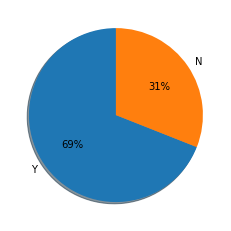

In [ ]:
# estudo da variável independente (variável target)
LSX=df['Loan_Status'].value_counts().index
LSY=round(df['Loan_Status'].value_counts()/df['Loan_Status'].count()*100,0)
labels = LSX
sizes = LSY
separate = (0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=separate, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.show()
# percebe-se uma que cerca de 70% das solicitações de empréstimo foram aprovadas o que é absolutamente normal num modelo de empréstimo bancario.

In [ ]:
# vamos fazer uma investigação estatística nos valores das variáveis numéricas do dataframe determinando a média aritimética, desvio padrão,mediana e moda.
print(round(df['LoanAmount'].mean(),0),round(df['LoanAmount'].std(),0),round(df['LoanAmount'].median(),0),df['LoanAmount'].mode())
print(round(df['Loan_Amount_Term'].mean(),0),round(df['Loan_Amount_Term'].std(),0),round(df['Loan_Amount_Term'].median(),0),df['Loan_Amount_Term'].mode())
print(round(df['CoapplicantIncome'].mean(),0),round(df['CoapplicantIncome'].std(),0),round(df['CoapplicantIncome'].median(),0),df['CoapplicantIncome'].mode())

146.0 86.0 128.0 0    120.0
dtype: float64
342.0 65.0 360.0 0    360.0
dtype: float64
1621.0 2926.0 1188.0 0    0.0
dtype: float64


In [ ]:
# preenchendo os valores ausentes com indicadores estatísticos (média aritimética, moda e mediana)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
# preeenchendo as outras colunas com média aritimética, mediana ou moda.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
# vendo os missing values após aplicação da técnica de imputation
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# convertendo as variáveis categóricas em numéricas usando a função map (map function)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
df.info()
#Todos valores na tabela são valores numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


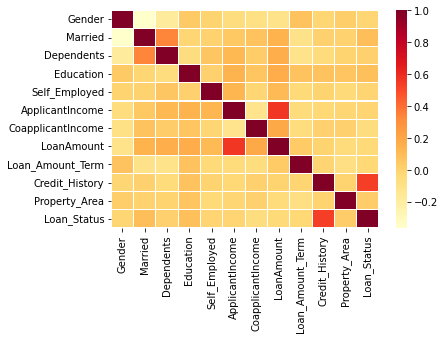

In [ ]:
# vamos verificar a relação entre todas as variáveis.
corr = df.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()
#observamos que a variável Credit_History é a que tem mais impacto na variável Loan_Status e que as variáveis
#o mapa de calor mostra que LoanAmount e ApplicationIncome são as outras variáveis importantes no problema.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


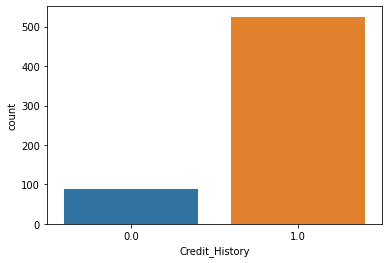

In [ ]:
# realizando uma investigação da variável Credit_History para sabermos a importância desta e qual a sua influência na variável (target) Loan_Status
sns.countplot(df['Credit_History'])
plt.show()
# percebe-se uma desproporção entre as classes.
# para a variável Cridit_History será necessário realizar posteriormente a técnica de balanço de classes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

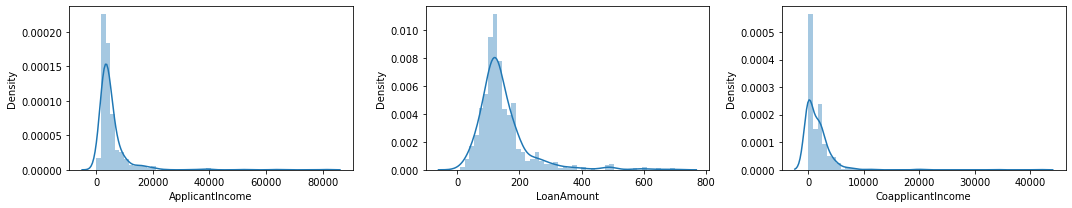

In [ ]:
# estudo das variáveis contínuas Loan_Amount, CoapplicantIncome	e Applicant_Income
plt.figure(figsize = (15,3))
plt.subplot(1, 3, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 3, 2)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 3, 3)
sns.distplot(df['CoapplicantIncome'])
plt.tight_layout()
plt.show()
# percebe-se que estas variáveis não obedecem a uma distribuição normal.
# pela análise das variáveis estatísticas e do histograma a variável CoapplicantIncome pode ser desprezada.

In [ ]:
# vamos precisar aplicar uma função log ao conjunto de dados no sentido de melhorar o 'shape' da função de distribuição
# das variáveis numéricas LoanAmount e ApplicantIncome
df['LoanAmount']=df['LoanAmount'].map(lambda x:np.log(x))
df['ApplicantIncome']=df['ApplicantIncome'].map(lambda x:np.log(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


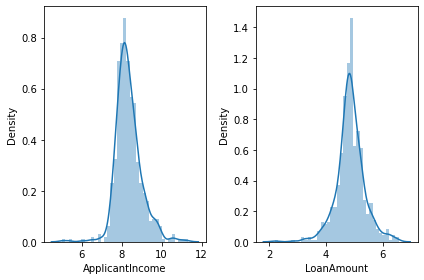

In [ ]:
# plotando novamente as variáveis contínuas.
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.distplot(df['LoanAmount'])
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,8.674026,0.0,4.852030,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,8.699515,0.0,4.948760,360.0,1.0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


In [ ]:
# applying for loop to bring all the variables in range 0 to 1
for i in df.columns[1:]:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.5+ KB


In [ ]:
# again looking at first five rows of pre-processed data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.582270,0.000000,0.609760,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.543501,0.036192,0.609760,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.476150,0.000000,0.457624,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.452363,0.056592,0.594936,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.586321,0.000000,0.631977,0.74359,1.0,1.0,1.0


In [ ]:
# saving the pre-processed data
df.to_csv('loan_prediction_data_pre_processing.csv', index=False)
files.download('loan_prediction_data_pre_processing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#FIM  da parte de pré-processamento dos dados do DataFrame